# Support Vector Regression (SVR)

## Importing the libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [19]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [20]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [21]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [22]:
y = y.reshape(len(y),1)

In [23]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler_X= StandardScaler()
scaler_Y=StandardScaler()
X=scaler_X.fit_transform(X)
y=scaler_Y.fit_transform(y)

In [25]:
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [26]:
from sklearn.svm import SVR

svr_reg = SVR(kernel= 'rbf')

svr_reg.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting a new result

In [29]:
np.set_printoptions(2)

scaler_Y.inverse_transform(svr_reg.predict(scaler_X.transform([[6.5]])) )

array([170370.02])

## Visualising the SVR results

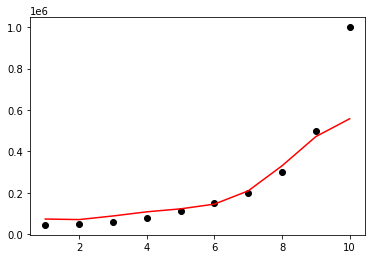

In [31]:
plt.scatter(scaler_X.inverse_transform(X), scaler_Y.inverse_transform(y) , color='black')
plt.plot(scaler_X.inverse_transform(X) , scaler_Y.inverse_transform( svr_reg.predict(X) ) , color='red')

In [33]:
print(scaler_Y.inverse_transform(y))

[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


## Visualising the SVR results (for higher resolution and smoother curve)

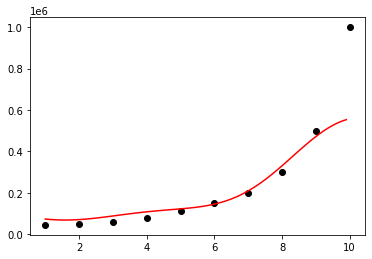

In [37]:
X_grid= np.arange(min(scaler_X.inverse_transform(X)) , max(scaler_X.inverse_transform(X)), 0.1)

X_grid=X_grid.reshape(len(X_grid),1)

plt.scatter(scaler_X.inverse_transform(X), scaler_Y.inverse_transform(y) , color='black')
plt.plot(X_grid , scaler_Y.inverse_transform( svr_reg.predict(scaler_X.transform(X_grid)) ) , color='red')